# MNIST Digit Classification Challenge
- Goal: Classify handwritten digits
- Type: Multiclass classification

## Imports and Constants

In [45]:
%reset -f

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data

from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [47]:
FIGSIZE = (12, 10)

plt.rc('figure', figsize=FIGSIZE)
sns.set_style('whitegrid')

## Get the data

In [48]:
(X_train, y_train), (X_test, y_test) = load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [49]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Exploratory Data Analysis

In [50]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

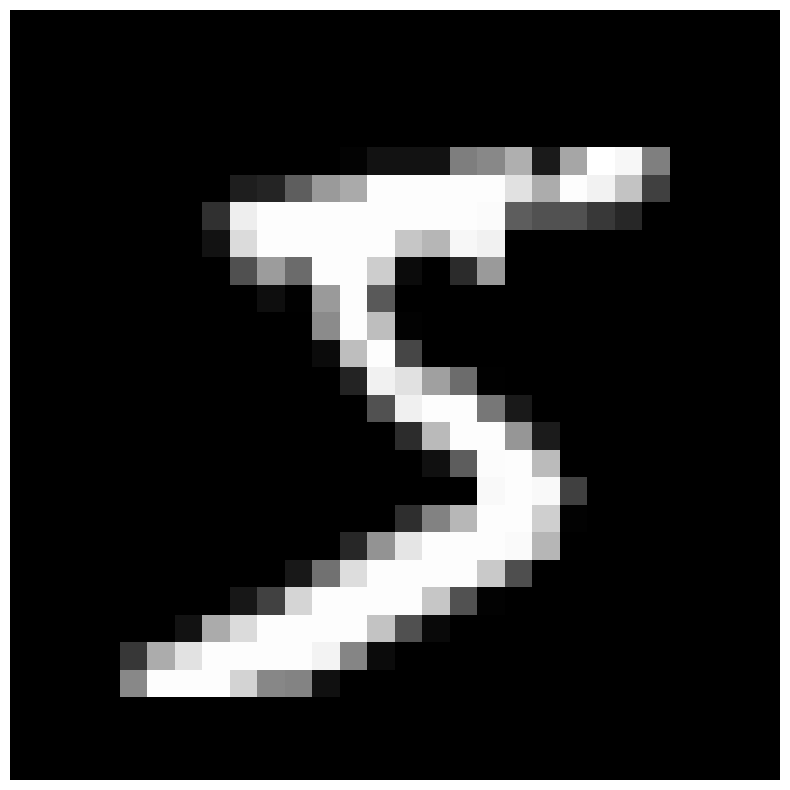

In [51]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

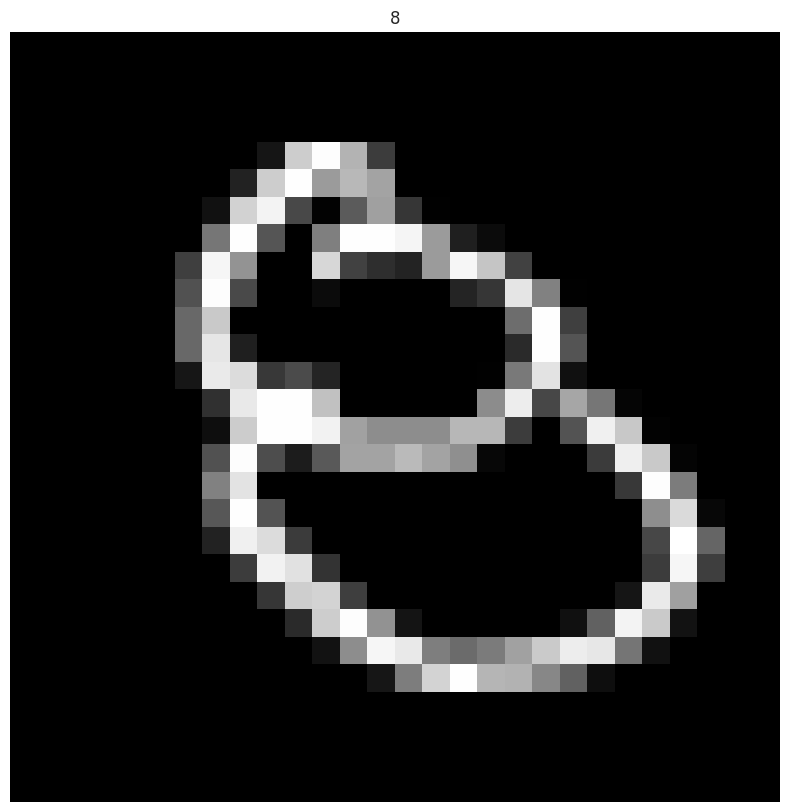

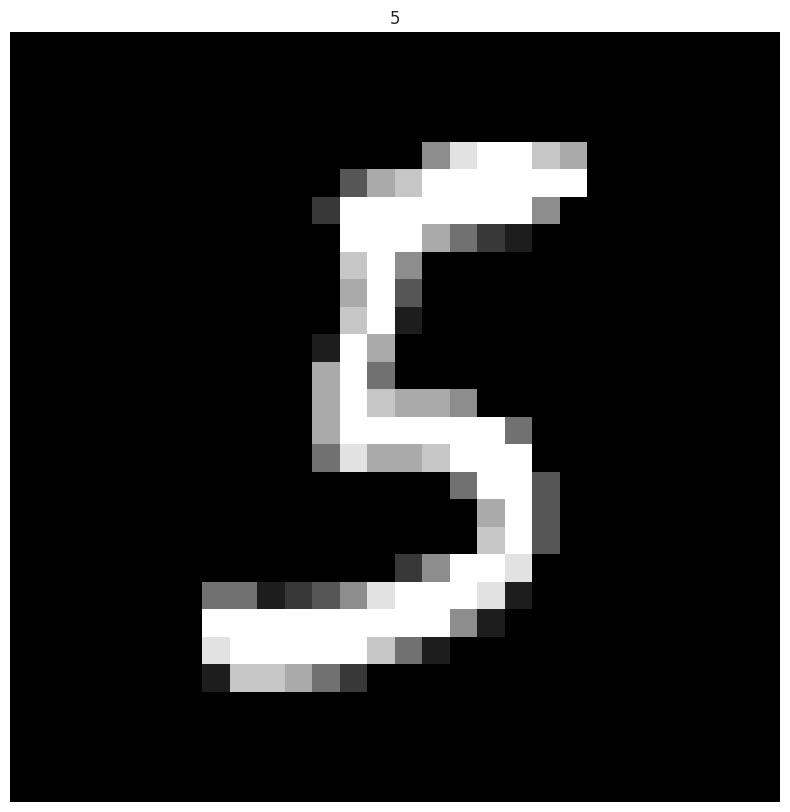

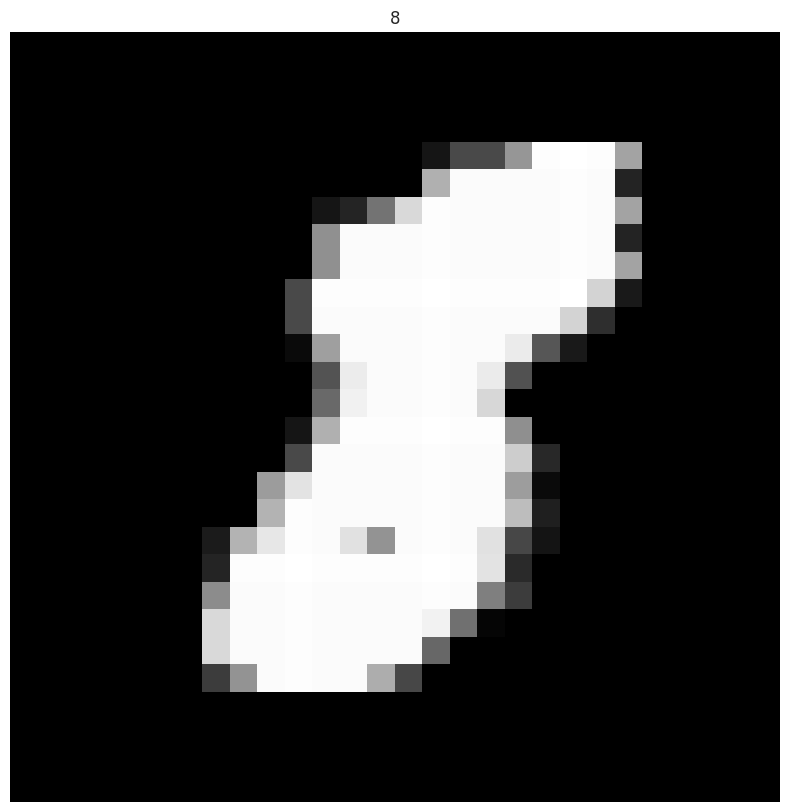

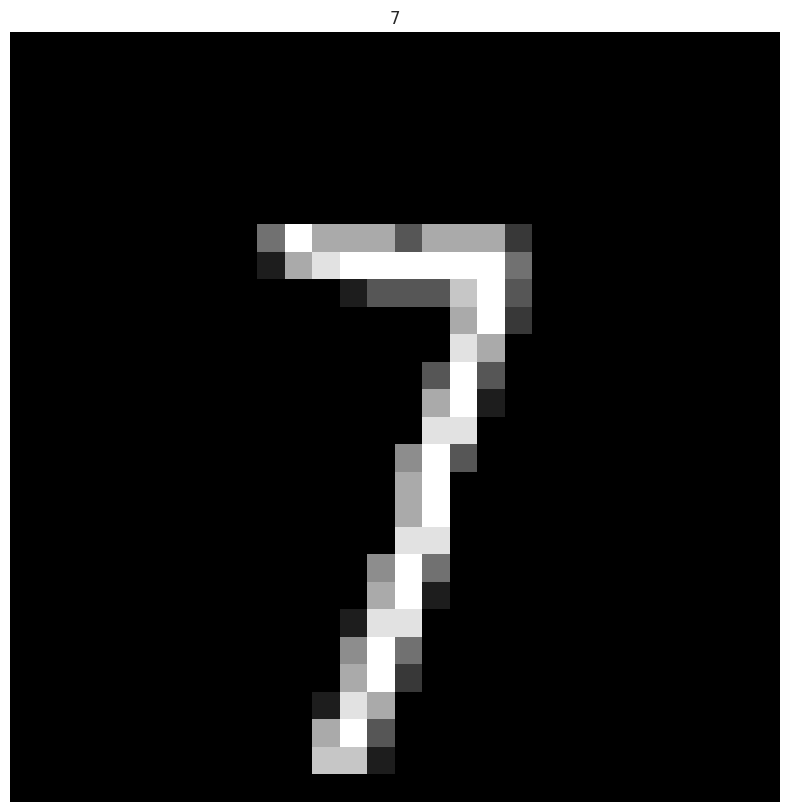

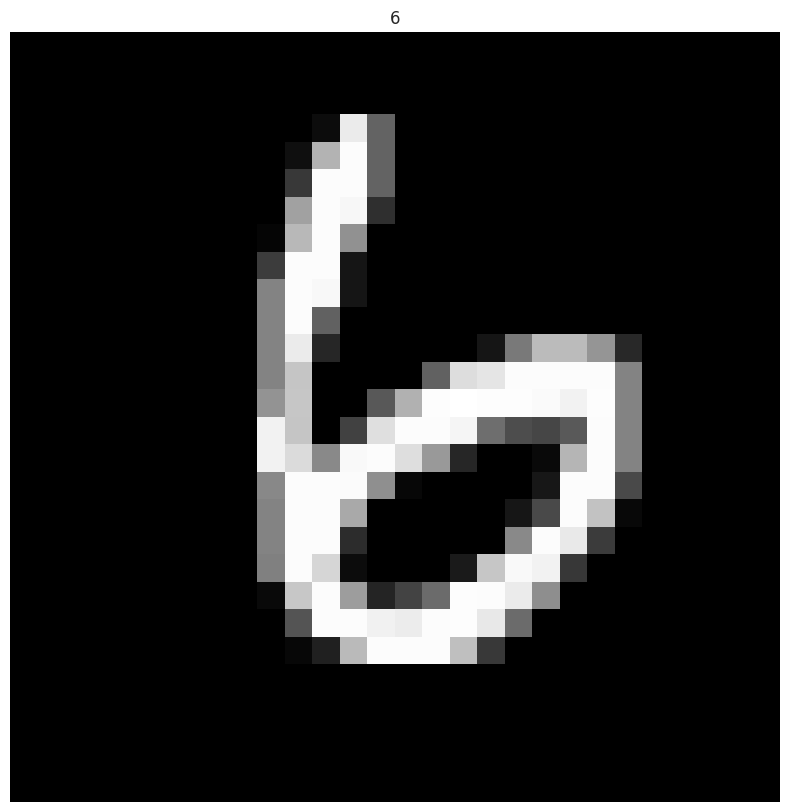

In [52]:
def plot_random(n):
  indices = np.random.choice(X_train.shape[0], n, replace=False)

  for i in indices:
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.show()

plot_random(5)

## Preprocessing

In [53]:
def preprocess_inputs(data):
  # since we want to pass a whole image to a NN
  # that image must be one vector, not a matrix
  data = data.reshape(-1, 28 * 28)

  # Scale values to be between 0 and 1
  data = data.astype(float) / 255.0

  return data

In [54]:
X_train = preprocess_inputs(X_train)
X_test = preprocess_inputs(X_test)

In [55]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Model building (using the [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model))

In [56]:
model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10)
])

# Another way of doing the same
# model = tf.keras.Sequential()
# model.add(Input(X_train.shape[1]))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.30,
    batch_size=32,
    verbose=2
)

Epoch 1/5


2024-04-21 15:49:08.645701: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.
2024-04-21 15:49:18.047678: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 56448000 exceeds 10% of free system memory.


1313/1313 - 10s - 8ms/step - accuracy: 0.9351 - loss: 0.2126 - val_accuracy: 0.9635 - val_loss: 0.1214
Epoch 2/5
1313/1313 - 8s - 6ms/step - accuracy: 0.9724 - loss: 0.0875 - val_accuracy: 0.9634 - val_loss: 0.1261
Epoch 3/5
1313/1313 - 12s - 9ms/step - accuracy: 0.9805 - loss: 0.0602 - val_accuracy: 0.9719 - val_loss: 0.0961
Epoch 4/5
1313/1313 - 11s - 8ms/step - accuracy: 0.9856 - loss: 0.0446 - val_accuracy: 0.9749 - val_loss: 0.0953
Epoch 5/5
1313/1313 - 11s - 8ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9752 - val_loss: 0.1024


### Introducing the validation split! From now on tune hyperparameters only on the validation set. Use the training set only when you achieve maximum validation accuracy!

In [58]:
loss, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=32,
    verbose=2
)

313/313 - 1s - 3ms/step - accuracy: 0.9765 - loss: 0.0857


In [59]:
loss

0.08571392297744751

In [60]:
acc

0.9764999747276306

### But what are logits?

In [61]:
logits = model(X_train[0].reshape(1, -1))[0]
logits

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-14.456136  ,  -1.3134984 ,  -6.500712  ,  12.640982  ,
       -20.810152  ,  16.464981  ,  -8.340821  ,  -7.5107346 ,
        -4.7506185 ,  -0.17606926], dtype=float32)>

In [62]:
# logits don't sum up to 1
tf.reduce_sum(logits)

<tf.Tensor: shape=(), dtype=float32, numpy=-34.75278>

In [63]:
# tf.keras.activations.softmax expects a batch of images
batch_one_image = logits[tf.newaxis, ...]
batch_one_image_probs = tf.keras.activations.softmax(batch_one_image)
batch_one_image_probs

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[3.64541466e-14, 1.86003781e-08, 1.03930586e-10, 2.13734712e-02,
        6.34210030e-17, 9.78626370e-01, 1.65041904e-11, 3.78526203e-11,
        5.98135097e-10, 5.80096930e-08]], dtype=float32)>

In [64]:
tf.argmax(batch_one_image_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [65]:
tf.argmax(batch_one_image_probs[0]).numpy()

5

In [66]:
y_train[0]

5

In [67]:
y_true = y_train[0]
y_pred = model(X_train[0].reshape(1, -1))[0]

In [68]:
y_true

5

In [69]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-14.456136  ,  -1.3134984 ,  -6.500712  ,  12.640982  ,
       -20.810152  ,  16.464981  ,  -8.340821  ,  -7.5107346 ,
        -4.7506185 ,  -0.17606926], dtype=float32)>

In [70]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
scce(y_true, y_pred).numpy()

0.021605367

### Plot the training and testing accuracies

In [71]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Summarize history for accuracy

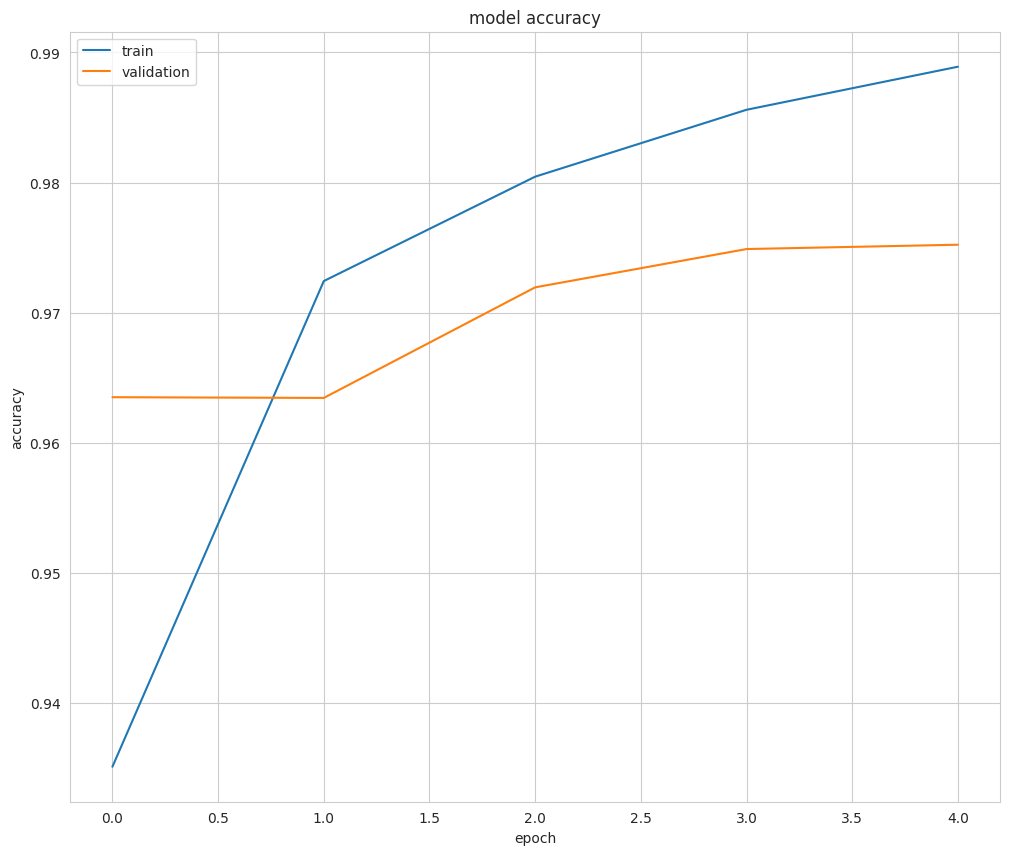

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

#### Summarize history for loss

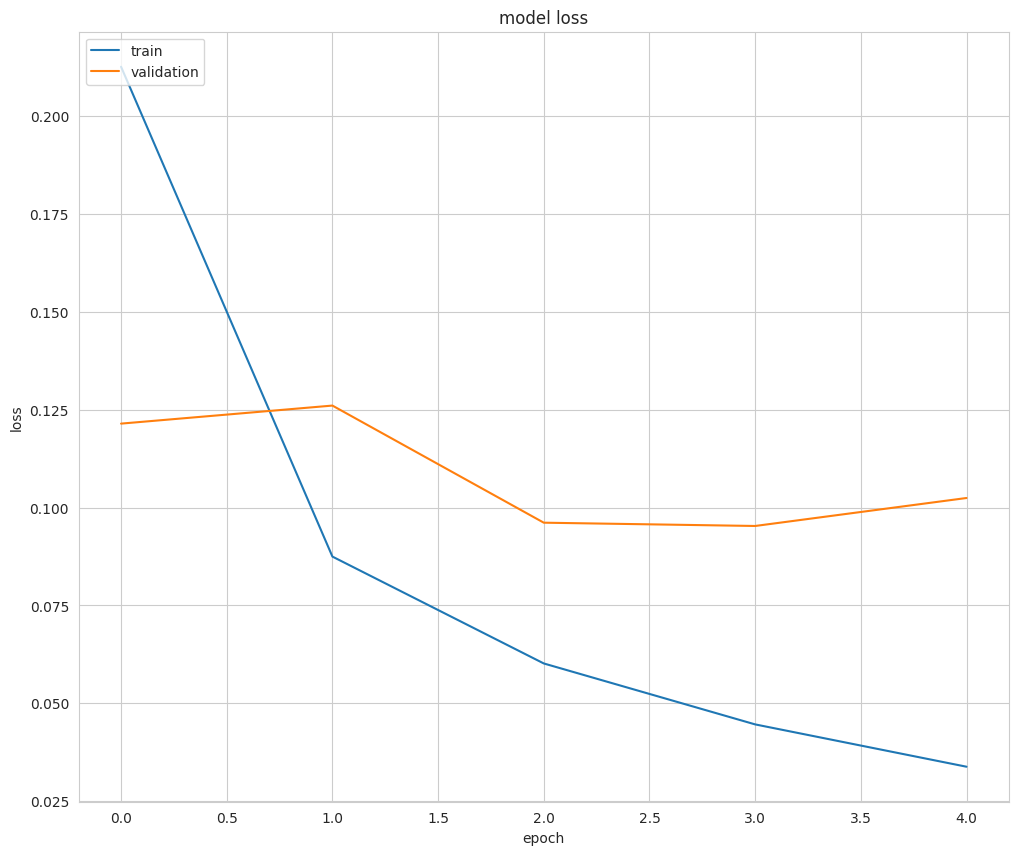

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

From both plots we can see that we have overfitting after epoch 4. That means that we should only train for a maximum of three epochs.

## Model building (using the [Functional API](https://www.tensorflow.org/guide/keras/functional))

In [74]:
# Using the Functional API
inputs = Input((X_train.shape[1],))

x = Dense(512, activation='relu', name='first_layer')(inputs)
x = Dense(256, activation='relu', name='second_layer')(x)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_layer (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.3,
    batch_size=32,
    verbose=2
)

Epoch 1/5


2024-04-21 15:50:03.672711: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 - 14s - 10ms/step - accuracy: 0.9335 - loss: 0.2181 - val_accuracy: 0.9651 - val_loss: 0.1186
Epoch 2/5
1313/1313 - 19s - 15ms/step - accuracy: 0.9723 - loss: 0.0874 - val_accuracy: 0.9694 - val_loss: 0.1042
Epoch 3/5
1313/1313 - 19s - 14ms/step - accuracy: 0.9804 - loss: 0.0596 - val_accuracy: 0.9695 - val_loss: 0.1076
Epoch 4/5
1313/1313 - 19s - 14ms/step - accuracy: 0.9860 - loss: 0.0423 - val_accuracy: 0.9698 - val_loss: 0.1113
Epoch 5/5
1313/1313 - 18s - 14ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9721 - val_loss: 0.1117


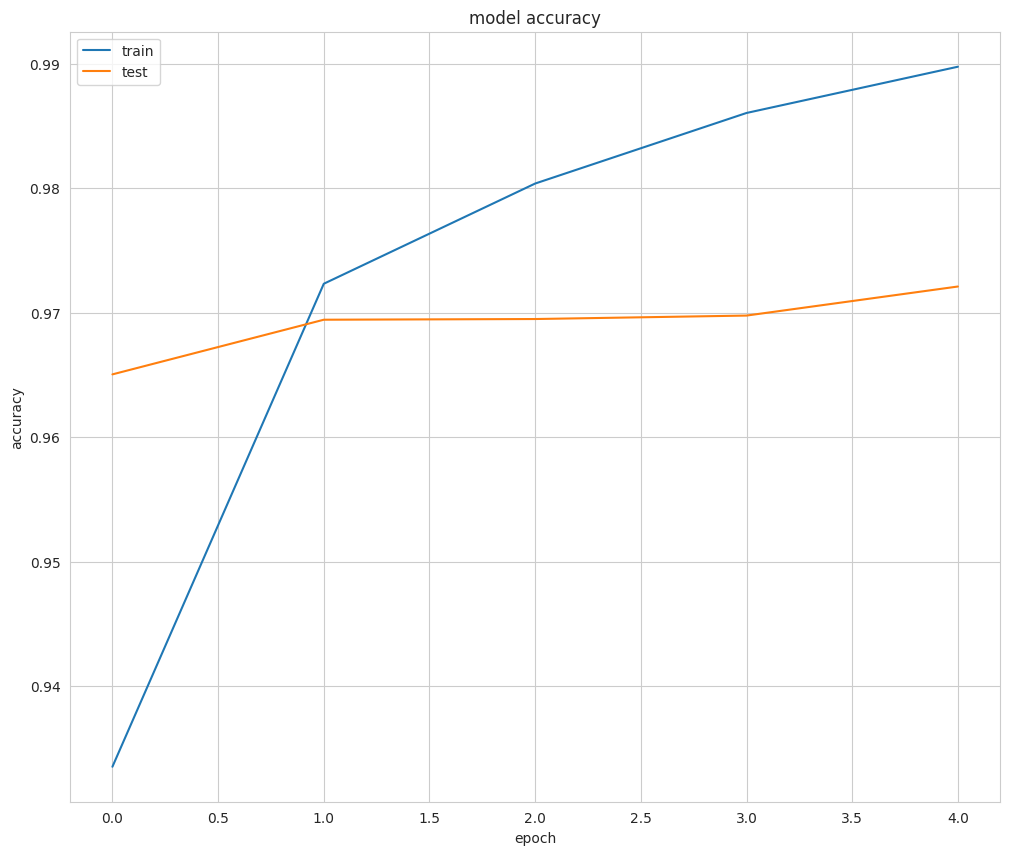

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

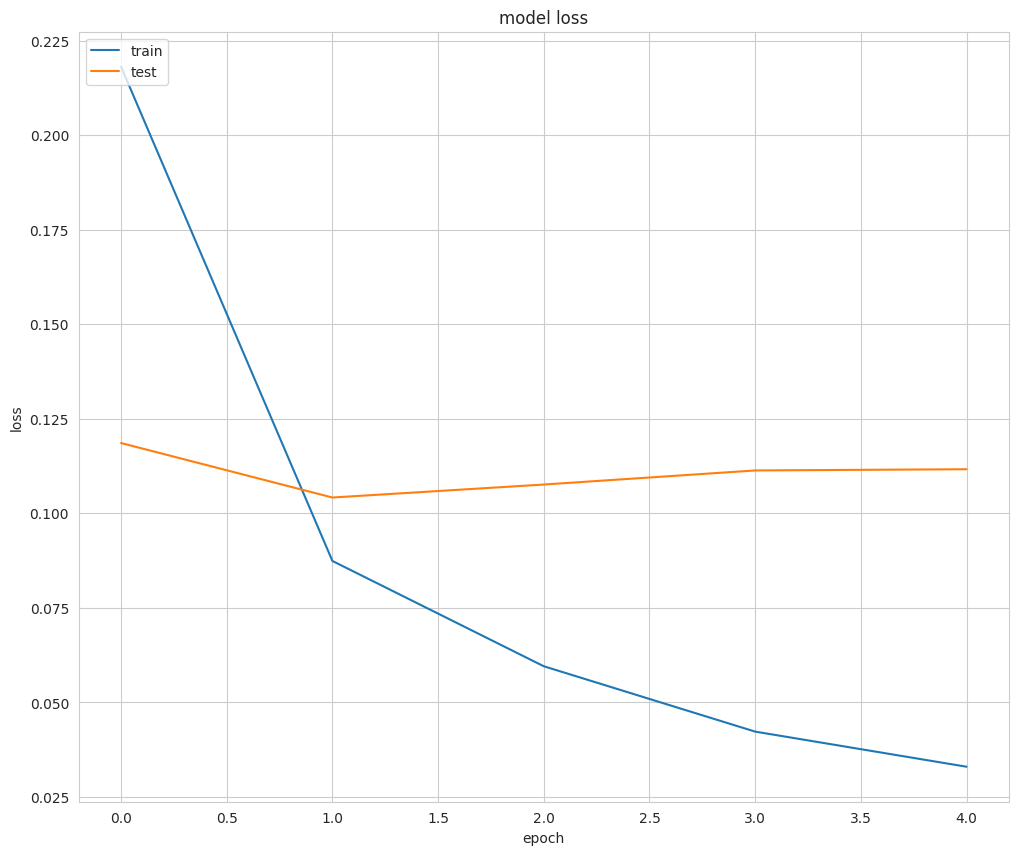

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [78]:
model.evaluate(
    X_test,
    y_test,
    batch_size=32,
    verbose=2
)

313/313 - 1s - 3ms/step - accuracy: 0.9759 - loss: 0.0853


[0.0852842852473259, 0.9758999943733215]